In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
data = pd.read_csv('owid-co2-data.csv')
data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [3]:
# Select relevant columns for sectoral CO2 emissions prediction
columns = [
    'country', 'year', 'gdp', 'population', 'cement_co2', 'coal_co2', 'oil_co2', 'gas_co2',
    'energy_per_capita', 'energy_per_gdp', 'cement_co2_per_capita','share_global_cement_co2'
]
sector_data = data[columns]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    47415 non-null  object 
 1   year                                       47415 non-null  int64  
 2   iso_code                                   39548 non-null  object 
 3   population                                 39414 non-null  float64
 4   gdp                                        14495 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [4]:
# # Fill missing values with the mean value of the respective columns
# for column in columns[2:]:  # Skip 'country' and 'year'
#     sector_data[column].fillna(sector_data[column].mean(), inplace=True)

# # Display the first few rows of the preprocessed data
# print(sector_data.head())

In [5]:
# Fill missing values with the mean value of the respective columns
for column in columns[2:]:  # Skip 'country' and 'year'
    sector_data=sector_data.dropna(subset=[column])

# Display the first few rows of the preprocessed data
print(sector_data.head())

         country  year           gdp  population  cement_co2  coal_co2  \
130  Afghanistan  1980  1.532984e+10  12486640.0       0.023     0.316   
131  Afghanistan  1981  1.564534e+10  11155196.0       0.033     0.333   
132  Afghanistan  1982  1.598041e+10  10088290.0       0.039     0.385   
133  Afghanistan  1983  1.675533e+10   9951447.0       0.006     0.385   
134  Afghanistan  1984  1.707215e+10  10243689.0       0.048     0.393   

     oil_co2  gas_co2  energy_per_capita  energy_per_gdp  \
130    0.925    0.187            623.929           0.508   
131    1.015    0.304            786.837           0.561   
132    0.993    0.396            926.651           0.585   
133    1.220    0.616           1149.196           0.683   
134    1.134    0.932           1121.573           0.673   

     cement_co2_per_capita  share_global_cement_co2  
130                  0.002                    0.006  
131                  0.003                    0.008  
132                  0.004      

In [6]:
sector_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 130 to 47410
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  6976 non-null   object 
 1   year                     6976 non-null   int64  
 2   gdp                      6976 non-null   float64
 3   population               6976 non-null   float64
 4   cement_co2               6976 non-null   float64
 5   coal_co2                 6976 non-null   float64
 6   oil_co2                  6976 non-null   float64
 7   gas_co2                  6976 non-null   float64
 8   energy_per_capita        6976 non-null   float64
 9   energy_per_gdp           6976 non-null   float64
 10  cement_co2_per_capita    6976 non-null   float64
 11  share_global_cement_co2  6976 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 708.5+ KB


In [7]:
columns = [
    'gdp', 'population','energy_per_capita', 'energy_per_gdp', 'cement_co2_per_capita','share_global_cement_co2'
]
corr_data = data[columns]

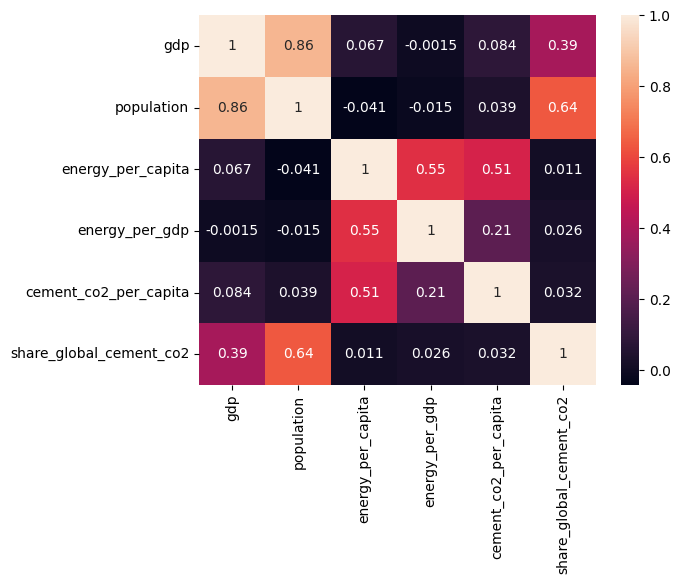

In [8]:
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [35]:
# Function to build and evaluate the model for each sector
def build_and_evaluate_model(sector, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{sector} CO2 Emissions:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')
        # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted {sector} CO2 Emissions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.show()

  

In [10]:
# Features and targets
X = sector_data[['gdp', 'population', 'energy_per_capita', 'energy_per_gdp', 'cement_co2_per_capita','share_global_cement_co2'
]]
sectors = ['cement_co2', 'coal_co2', 'oil_co2', 'gas_co2']

In [11]:
min=data['cement_co2'].min()
max=data['cement_co2'].max()
print('min:',min)
print('max:',max)

min: 0.0
max: 1692.404


In [12]:
min=data['coal_co2'].min()
max=data['coal_co2'].max()
print('min:',min)
print('max:',max)

min: 0.0
max: 15219.304


In [13]:
min=data['oil_co2'].min()
max=data['oil_co2'].max()
print('min:',min)
print('max:',max)

min: 0.0
max: 12377.949


In [14]:
min=data['gas_co2'].min()
max=data['gas_co2'].max()
print('min:',min)
print('max:',max)

min: 0.0
max: 7922.112


**MSE < (max/10)^2**

**MAE/RMSE < below 10% of max( reasonable starting point)**

**MAE/RMSE < below 5% of max(better performance)**


In [15]:
print(pow(1692.404/10,2))
print(1692.404*0.05)

28642.312992159998
84.62020000000001


cement_co2 CO2 Emissions:
Mean Squared Error (MSE): 103.02242053713888
Root Mean Squared Error (RMSE): 10.149996085572589
Mean Absolute Error (MAE): 0.685026683381092
R-squared (R²): 0.9750062368808907



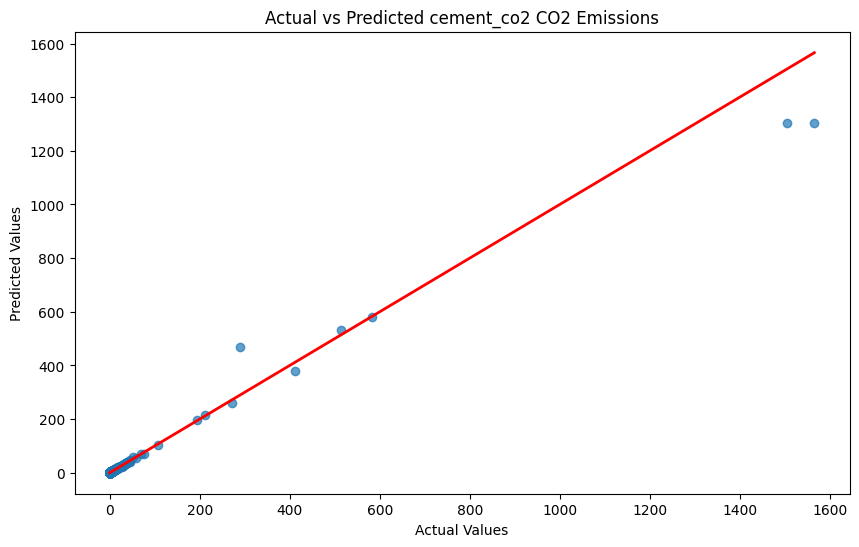

In [16]:

for sector in sectors[:1]:
    y = sector_data[sector]
    build_and_evaluate_model(sector, X, y)

In [17]:
# Function to build and evaluate the model for each sector
def build_and_evaluate_model(sector, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor model
    from sklearn.linear_model import Lasso
    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, lasso_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, lasso_pred)
    r2 = r2_score(y_test, lasso_pred)

    print(f'{sector} CO2 Emissions:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')

In [18]:
# Build and evaluate models for each sector
for sector in sectors[:1]:
    y = sector_data[sector]
    build_and_evaluate_model(sector, X, y)

cement_co2 CO2 Emissions:
Mean Squared Error (MSE): 453.24495384457384
Root Mean Squared Error (RMSE): 21.289550343879363
Mean Absolute Error (MAE): 4.494881742006626
R-squared (R²): 0.8900404693244506



In [33]:
# Function to build and evaluate the model for each sector
def build_and_evaluate_model(sector, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    from xgboost import XGBRegressor
    xgb_model = XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, xgb_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, xgb_pred)
    r2 = r2_score(y_test, xgb_pred)

    print(f'{sector} CO2 Emissions:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')

In [34]:
# Build and evaluate models for each sector
for sector in sectors[:1]:
    y = sector_data[sector]
    build_and_evaluate_model(sector, X, y)

cement_co2 CO2 Emissions:
Mean Squared Error (MSE): 21.319960801245948
Root Mean Squared Error (RMSE): 4.617354307527846
Mean Absolute Error (MAE): 0.4461293018679548
R-squared (R²): 0.9948276690918658



In [21]:
# Function to build and evaluate the model for each sector
def build_and_evaluate_model(sector, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Support Vector Regression
    from sklearn.svm import SVR
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    svr_pred = svr_model.predict(X_test)
    mse = mean_squared_error(y_test, svr_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, svr_pred)
    r2 = r2_score(y_test, svr_pred)

    print(f'{sector} CO2 Emissions:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')

In [22]:
# Build and evaluate models for each sector
for sector in sectors[:1]:
    y = sector_data[sector]
    build_and_evaluate_model(sector, X, y)

cement_co2 CO2 Emissions:
Mean Squared Error (MSE): 3874.1276372012476
Root Mean Squared Error (RMSE): 62.24249060891802
Mean Absolute Error (MAE): 5.21635456738667
R-squared (R²): 0.0601169342308735



In [23]:
# Function to build and evaluate the model for each sector
def build_and_evaluate_model(sector, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    from sklearn.linear_model import LinearRegression, Ridge
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_pred = linear_model.predict(X_test)


    mse = mean_squared_error(y_test, linear_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test,linear_pred)
    r2 = r2_score(y_test, linear_pred)

    print(f'{sector} CO2 Emissions:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')

In [24]:
# Build and evaluate models for each sector
for sector in sectors[:1]:
    y = sector_data[sector]
    build_and_evaluate_model(sector, X, y)

cement_co2 CO2 Emissions:
Mean Squared Error (MSE): 459.81072806975544
Root Mean Squared Error (RMSE): 21.443197710923513
Mean Absolute Error (MAE): 4.8692503708157115
R-squared (R²): 0.8884475791086884



In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\karth\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
# Function to build and evaluate the model for each sector
def build_and_evaluate_model(sector, X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the ANN model
    model = Sequential()

    # Adding the input layer and the first hidden layer
    model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

    # Adding the second hidden layer
    model.add(Dense(units=64, activation='relu'))

    # Adding the output layer
    model.add(Dense(units=1, activation='linear'))

    # Compiling the ANN
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the ANN on the Training set
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

    # Predicting the Test set results
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = model.evaluate(X_test, y_test)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{sector} CO2 Emissions:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')
    print('')
        # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted {sector} CO2 Emissions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.show()

Epoch 1/100
157/157 [==============================] - 2s 5ms/step - loss: 1664.7854 - val_loss: 3590.8357
Epoch 2/100
157/157 [==============================] - 0s 3ms/step - loss: 923.0029 - val_loss: 663.3894
Epoch 3/100
157/157 [==============================] - 0s 3ms/step - loss: 410.4253 - val_loss: 190.1934
Epoch 4/100
157/157 [==============================] - 0s 3ms/step - loss: 370.1363 - val_loss: 180.3896
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 304.0781 - val_loss: 105.0872
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: 270.6387 - val_loss: 102.5825
Epoch 7/100
157/157 [==============================] - 1s 4ms/step - loss: 250.8863 - val_loss: 310.1848
Epoch 8/100
157/157 [==============================] - 0s 3ms/step - loss: 226.6445 - val_loss: 83.9555
Epoch 9/100
157/157 [==============================] - 0s 3ms/step - loss: 203.8331 - val_loss: 35.2939
Epoch 10/100
157/157 [==============================] -

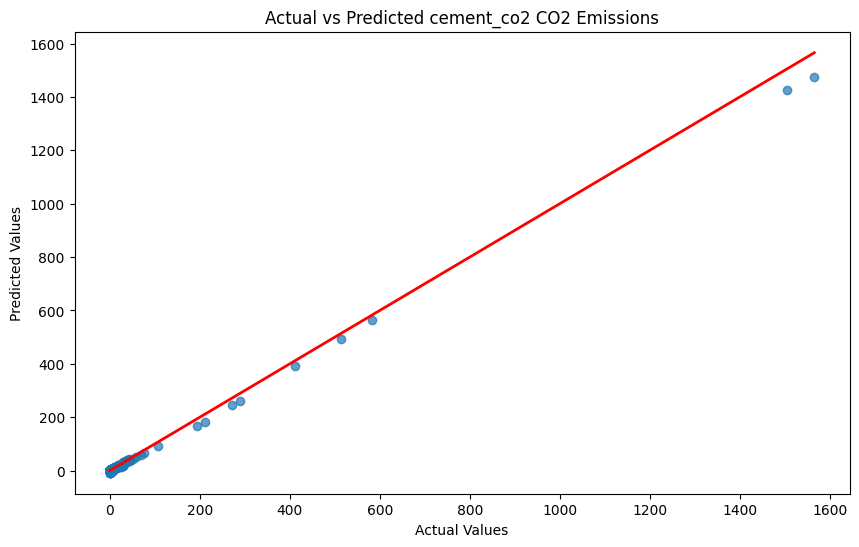

In [28]:
# Build and evaluate models for each sector
for sector in sectors[:1]:
    y = sector_data[sector]
    build_and_evaluate_model(sector, X, y)

In [29]:
# Function to build and evaluate the model for each sector
# Build and evaluate models for each sector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Conv1D, MaxPooling1D, Flatten, Dense

def build_and_evaluate_model(sector, X, y):
    # Convert DataFrame to NumPy array
    X = X.values
    y = y.values

    # Reshape X for Conv1D input (samples, timesteps, features)
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    # Reshape back for scaling
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[2]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[2]))

    X_train_scaled = scaler.fit_transform(X_train_reshaped)
    X_test_scaled = scaler.transform(X_test_reshaped)

    # Reshape back to 3D for Conv1D
    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Build the CNN model
    model = Sequential()

    # Adding the Conv1D layer with kernel size of 1
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())

    # Adding the output layer
    model.add(Dense(units=1))

    # Compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

    # Predicting the test set results
    y_pred = model.predict(X_test_scaled)

    # Evaluating the model
    mse = model.evaluate(X_test_scaled, y_test)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Cement CO2 Emissions Prediction:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')

 

In [30]:
X = sector_data[['year', 'gdp', 'population', 'energy_per_capita', 'energy_per_gdp', 'cement_co2_per_capita', 'share_global_cement_co2']]
y = sector_data[['cement_co2']]

In [31]:
build_and_evaluate_model(sector, X, y)

Epoch 1/100
157/157 [==============================] - 1s 3ms/step - loss: 1705.9514 - val_loss: 4079.4390
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 1582.5834 - val_loss: 3621.1653
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 1422.7603 - val_loss: 3212.5911
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 1268.8588 - val_loss: 2768.3452
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 1095.3701 - val_loss: 2294.5515
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 927.0609 - val_loss: 1814.3950
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 768.5186 - val_loss: 1383.6167
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 637.0767 - val_loss: 1048.2922
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 530.4248 - val_loss: 818.5784
Epoch 10/100
157/157 [====================

In [36]:
def build_and_evaluate_model(sector, X, y):
    # Convert DataFrame to NumPy array
    X = X.values
    y = y.values

    # Reshape X for LSTM input (samples, timesteps, features)
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    # Reshape back for scaling
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[2]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[2]))

    X_train_scaled = scaler.fit_transform(X_train_reshaped)
    X_test_scaled = scaler.transform(X_test_reshaped)

    # Reshape back to 3D for LSTM
    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Build the LSTM model
    model = Sequential()

    # Adding the LSTM layer
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))

    # Compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

    # Predicting the test set results
    y_pred = model.predict(X_test_scaled)

    # Evaluating the model
    mse = model.evaluate(X_test_scaled, y_test)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{sector} CO2 Emissions Prediction:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R²): {r2}')
    print('')




In [37]:
X = sector_data[['year', 'gdp', 'population', 'energy_per_capita', 'energy_per_gdp', 'cement_co2_per_capita', 'share_global_cement_co2']]
y = sector_data[['cement_co2']]
build_and_evaluate_model(sector, X, y)

Epoch 1/100
157/157 [==============================] - 6s 10ms/step - loss: 1711.5120 - val_loss: 4193.6011
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 1648.9146 - val_loss: 4137.0586
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 1617.9412 - val_loss: 4106.3633
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 1596.4154 - val_loss: 4083.9709
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 1580.6866 - val_loss: 4063.8804
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 1566.8092 - val_loss: 4046.9663
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 1554.0730 - val_loss: 4030.1094
Epoch 8/100
157/157 [==============================] - 1s 5ms/step - loss: 1541.4629 - val_loss: 4014.5259
Epoch 9/100
157/157 [==============================] - 1s 5ms/step - loss: 1529.4004 - val_loss: 3998.5627
Epoch 10/100
157/157 [==============